<a href="https://colab.research.google.com/github/amitanshupanigrahi2704/EDA-/blob/main/21BDS0244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Reg. No: 21BDS0244    Name: Amitanshu Panigrahi
# Dataset: https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv

# MODULE 1

# Importing necessary Libraries and Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data_url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/bodyPerformance.csv"
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Dimensions of the dataset
print("\nDimensions of the dataset:")
print(df.shape)

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Check the data types
print("\nData types:")
print(df.dtypes)



First 5 rows of the dataset:
   age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27      M      172.3      75.24        21.3       80.0     130.0   
1   25      M      165.0      55.80        15.7       77.0     126.0   
2   31      M      179.6      78.00        20.1       92.0     152.0   
3   32      M      174.5      71.10        18.4       76.0     147.0   
4   28      M      173.8      67.70        17.1       70.0     127.0   

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0       54.9                     18.4            60.0          217.0     C  
1       36.4                     16.3            53.0          229.0     A  
2       44.8                     12.0            49.0          181.0     C  
3       41.4                     15.2            53.0          219.0     B  
4       43.5                     27.1            45.0          217.0     B  

Dimensions of the dataset:
(13393, 12)

Summary statistics:
               

In [8]:
# MODULE 2

# Data Transformation: Merging, Concatenation, Joins

# Add a new column based on other attributes (eg. BMI)
df['BMI'] = df['weight_kg'] / (df['height_cm'] / 100) ** 2
print("\nAdded BMI column:")
print(df[['height_cm', 'weight_kg', 'BMI']].head())

# Splitting dataset into two for demonstration purposes
df1 = df.iloc[:len(df)//2]
df2 = df.iloc[len(df)//2:]

# Merging based on a common column (age)
merged_df = pd.merge(df1, df2, on='age', how='inner', suffixes=('_df1', '_df2'))
print("\nMerged DataFrame (Inner Join):")
print(merged_df.head())

# Concatenation along rows
concat_rows = pd.concat([df1, df2], axis=0)
print("\nConcatenated DataFrame (Rows):")
print(concat_rows.head())

# Concatenation along columns
concat_cols = pd.concat([df1.reset_index(drop=True), df2.reset_index(drop=True)], axis=1)
print("\nConcatenated DataFrame (Columns):")
print(concat_cols.head())

# Outer Join
outer_join_df = pd.merge(df1, df2, on='age', how='outer', suffixes=('_df1', '_df2'))
print("\nOuter Join DataFrame:")
print(outer_join_df.head())

# Left Join
left_join_df = pd.merge(df1, df2, on='age', how='left', suffixes=('_df1', '_df2'))
print("\nLeft Join DataFrame:")
print(left_join_df.head())

# Right Join
right_join_df = pd.merge(df1, df2, on='age', how='right', suffixes=('_df1', '_df2'))
print("\nRight Join DataFrame:")
print(right_join_df.head())

# Stack and Unstack Operations
stacked = df.stack()
unstacked = stacked.unstack()
print("\nStacked DataFrame:")
print(stacked.head())
print("\nUnstacked DataFrame:")
print(unstacked.head())

# Checking for duplicates
duplicated_rows = df[df.duplicated()]
print("\nDuplicated Rows:")
print(duplicated_rows)

# Drop duplicates
df_no_duplicates = df.drop_duplicates()
print("\nDataFrame after dropping duplicates:")
print(df_no_duplicates.shape)

# Handling missing values

# Forward fill
df_ffill = df.fillna(method='ffill')
print("\nMissing values handled using forward fill:")
print(df_ffill.isnull().sum())

# Backward fill
df_bfill = df.fillna(method='bfill')
print("\nMissing values handled using backward fill:")
print(df_bfill.isnull().sum())

# Replace with mean
df_mean = df.fillna(df.mean(numeric_only=True))
print("\nMissing values handled by replacing with mean:")
print(df_mean.isnull().sum())

# Replace with cumulative sum only for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
df_cumsum = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_cumsum[numeric_cols] = df_cumsum[numeric_cols].fillna(df_cumsum[numeric_cols].cumsum())
print("\nMissing values in numeric columns handled using cumulative sum:")
print(df_cumsum.isnull().sum())

# Drop rows with missing values
df_drop_rows = df.dropna()
print("\nDataFrame after dropping rows with missing values:")
print(df_drop_rows.isnull().sum())

# Drop columns with missing values
df_drop_cols = df.dropna(axis=1)
print("\nDataFrame after dropping columns with missing values:")
print(df_drop_cols.isnull().sum())


Added BMI column:
   height_cm  weight_kg        BMI
0      172.3      75.24  25.344179
1      165.0      55.80  20.495868
2      179.6      78.00  24.181428
3      174.5      71.10  23.349562
4      173.8      67.70  22.412439

Merged DataFrame (Inner Join):
   age gender_df1  height_cm_df1  weight_kg_df1  body fat_%_df1  \
0   27          M          172.3          75.24            21.3   
1   27          M          172.3          75.24            21.3   
2   27          M          172.3          75.24            21.3   
3   27          M          172.3          75.24            21.3   
4   27          M          172.3          75.24            21.3   

   diastolic_df1  systolic_df1  gripForce_df1  sit and bend forward_cm_df1  \
0           80.0         130.0           54.9                         18.4   
1           80.0         130.0           54.9                         18.4   
2           80.0         130.0           54.9                         18.4   
3           80.0        

<ipython-input-8-b86876e3cb16>:65: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-8-b86876e3cb16>:70: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')



Age groups created:
   age Age Group
0   27     20-30
1   25     20-30
2   31     30-40
3   32     30-40
4   28     20-30

BMI categories created:
         BMI   BMI Category
0  25.344179     Overweight
1  20.495868  Normal weight
2  24.181428  Normal weight
3  23.349562  Normal weight
4  22.412439  Normal weight


<ipython-input-9-917f07bad3a6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Age Group'], palette='viridis')


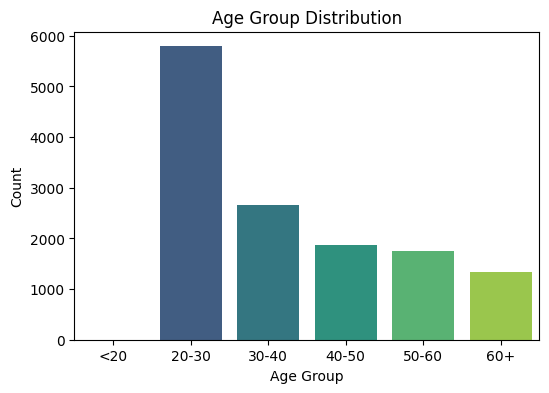

<ipython-input-9-917f07bad3a6>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['BMI Category'], palette='magma')


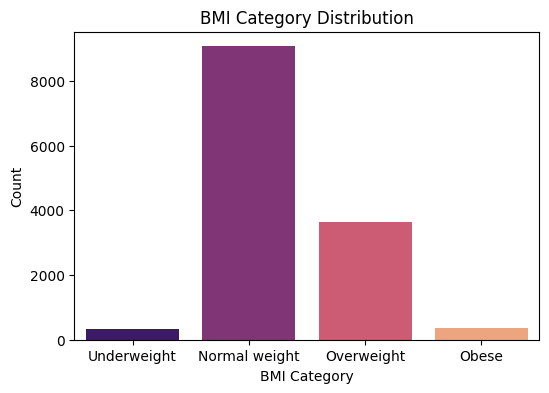

In [9]:
# Binning
define_age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']
df['Age Group'] = pd.cut(df['age'], bins=define_age_bins, labels=age_labels, right=False)
print("\nAge groups created:")
print(df[['age', 'Age Group']].head())

bmi_bins = [0, 18.5, 24.9, 29.9, 100]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df['BMI Category'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)
print("\nBMI categories created:")
print(df[['BMI', 'BMI Category']].head())

plt.figure(figsize=(6, 4))
sns.countplot(x=df['Age Group'], palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x=df['BMI Category'], palette='magma')
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()


<ipython-input-10-191579119afe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['BMI'], palette='Set2')


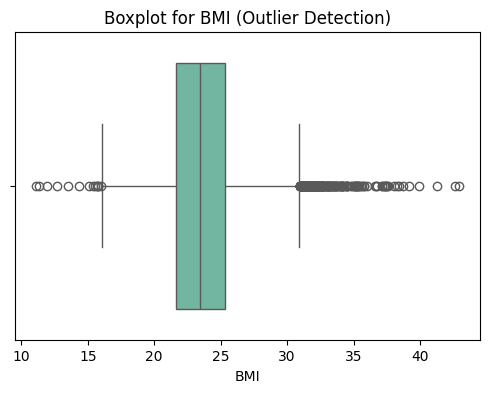


DataFrame after filtering outliers in BMI:
(13167, 15)


In [10]:
# Outlier Detection and Filtering (e.g., for 'BMI')
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['BMI'], palette='Set2')
plt.title('Boxplot for BMI (Outlier Detection)')
plt.xlabel('BMI')
plt.show()

# Removing outliers based on IQR
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
filtered_df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]
print("\nDataFrame after filtering outliers in BMI:")
print(filtered_df.shape)
